# Exploring the Bitcoin OTC Trust Network with Networkx

This project is an exploration of the Bitcoin OTC platform's trust network.

The dataset used is from SNAP, the Stanford Network Analysis Project. (https://snap.stanford.edu/index.html)

The dataset describes the trust relationships between users of the Bitcoin trading platform known as Bitcoin OTC.
It can be downloaded from https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html.

Since Bitcoin users are anonymous, there is a need to conduct transactions with trusted users to avoid fraud. In the trust network, the users are the nodes and each edge corresponds to a trust relationship between a pair of users. Each edge has a trust rating number between -10 (total distrust) to +10 (total trust). Therefore the network is a weighted, signed, directed network.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import sys
from neo4j import GraphDatabase

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the network CSV file.
edgelist = pd.read_csv("soc-sign-bitcoinotc.csv", skiprows=0,
                       header=None, sep=",",
                       names=["source", "target", "rating", "Time"],
                       nrows=None)

In [12]:
# Show the first few edges.
edgelist.head()

,source,target,rating,Time
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


In [13]:
# Create empty Directed Graph (DiGraph)
g = nx.DiGraph()

# Add edges and edge attributes. Weight parameter is equal to the trust value of the target user
# relative to the source user.
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], weight=elrow[2], attr_dict=elrow[3:].to_dict())

### Basic structure of the graph.

In [14]:
e = g.edges(data=True)
n = g.nodes(data=True)

# Show number of nodes.
print("Number of Nodes: {0}" .format(g.number_of_nodes()))

# Show number of edges.
print("Number of Edges: {0}" .format(g.number_of_edges()))

Number of Nodes: 5881
Number of Edges: 35592


Show the density of the graph.

In [15]:
nx.density(g)

0.0010292571373048454

### Display the graph

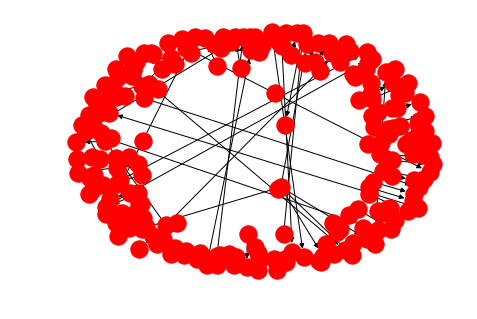

In [16]:
#Since the graph is too large to display, we take a random sample of it.
sel = edgelist.sample(128)
sg = nx.DiGraph()

# Add edges and edge attributes. Weight parameter is equal to the trust value of the target user
# relative to the source user.
for i, elrow in sel.iterrows():
    sg.add_edge(elrow[0], elrow[1], weight=elrow[2], attr_dict=elrow[3:].to_dict())

nx.draw(sg)

Show the diameter of the graph.

In [17]:
# Show Diameter of graph.
# Diameter is the longest shortest distance between two points on the graph.
#
# For diameter computation we use the undirected versions of the graph.
# Networkx only allows diameter computation for directed fully connected graphs.
ug = nx.to_undirected(g)

conn1 = "Connected" if nx.is_connected(ug) else "Unconnected"
print("The undirected trust network is: {0}" .format(conn1))

#print("Graph Diameter: {0}" .format(nx.algorithms.distance_measures.diameter(ug, usebounds=True)))

The undirected trust network is: Unconnected


*Since the graph is unconnected we cannot compute its diameter.*

### Degree Histogram

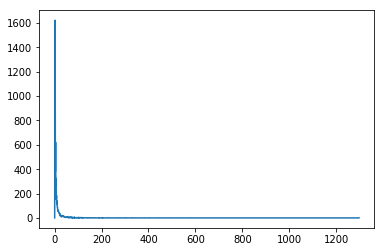

In [18]:
hg = nx.degree_histogram(ug)
h = plt.plot(hg)

References

1. https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html
2. https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial
3. https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf
4. https://conference.scipy.org/proceedings/scipy2008/paper_2/full_text.pdf
